/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1163: RuntimeWarning: invalid value encountered in double_scalars
  phi[1, 1] = sxx_m[1] / sxx_m[0]


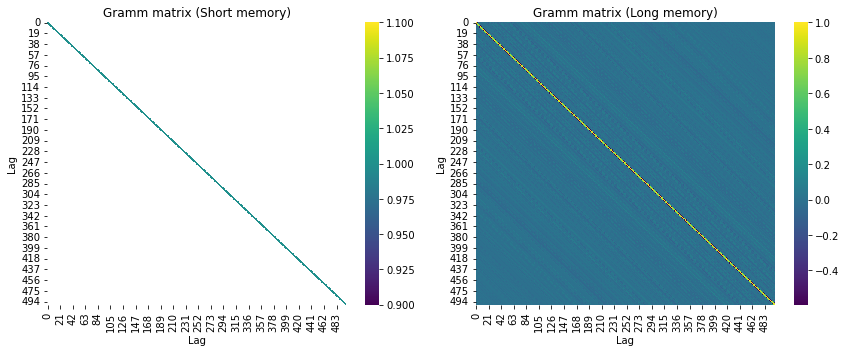

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import levinson_durbin
from scipy.linalg import toeplitz
from scipy.special import gegenbauer


# Creating AR(1) process with autocorrelation = 0.6
ar = np.array([.6])
ma = np.array([0.])
AR_object = ArmaProcess(ar, ma)
AR_process = AR_object.generate_sample(nsample=500)

# Creating long memory process (ARFIMA)
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
ARFIMA_process = arma_generate_sample(ar, ma, 500)

# Creating Gramm matrix
def gramm_matrix(data):
    acf = levinson_durbin(data, nlags=len(data)-1)[2]
    return toeplitz(acf)

# Creating heatmaps
def create_heatmap(matrix, ax, title):
    sns.heatmap(matrix, ax=ax, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Lag')

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

create_heatmap(gramm_matrix(AR_process), ax[0], 'Gramm matrix (Short memory)')
create_heatmap(gramm_matrix(ARFIMA_process), ax[1], 'Gramm matrix (Long memory)')

plt.tight_layout()
plt.show()


/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/ak/anaconda3/envs/timeSeries/lib/python3.7/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


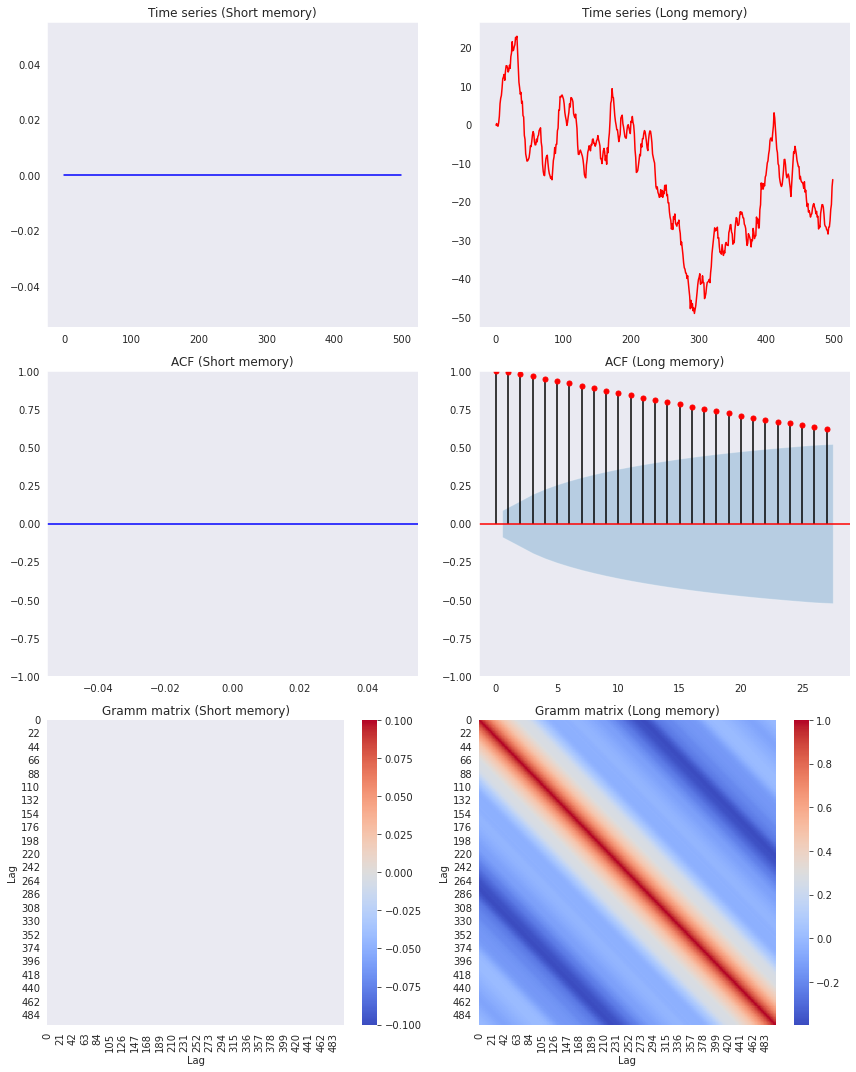

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import levinson_durbin, acf
from scipy.linalg import toeplitz
from statsmodels.graphics.tsaplots import plot_acf

# Set the style for seaborn
sns.set_style("dark")

# Creating AR(1) process with autocorrelation = 0.6
ar = np.array([.6])
ma = np.array([0.])
AR_object = ArmaProcess(ar, ma)
AR_process = AR_object.generate_sample(nsample=500)

# Creating long memory process (ARFIMA)
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)
arparams = np.array([.75, .25])
maparams = np.array([.65, 1.35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
ARFIMA_process = arma_generate_sample(ar, ma, 500)

# Creating Gramm matrix
def gramm_matrix(data):
    acf_values = acf(data, nlags=len(data)-1)
    return toeplitz(acf_values)

fig, ax = plt.subplots(3, 2, figsize=(12, 15))

# Plot time series
ax[0,0].plot(AR_process, color='blue')
ax[0,0].set_title('Time series (Short memory)')

ax[0,1].plot(ARFIMA_process, color='red')
ax[0,1].set_title('Time series (Long memory)')

# Plot ACF
plot_acf(AR_process, ax=ax[1,0], color='blue')
ax[1,0].set_title('ACF (Short memory)')

plot_acf(ARFIMA_process, ax=ax[1,1], color='red')
ax[1,1].set_title('ACF (Long memory)')

# Plot heatmap of Gramm matrix
sns.heatmap(gramm_matrix(AR_process), ax=ax[2,0], cmap='coolwarm')
ax[2,0].set_title('Gramm matrix (Short memory)')
ax[2,0].set_xlabel('Lag')
ax[2,0].set_ylabel('Lag')

sns.heatmap(gramm_matrix(ARFIMA_process), ax=ax[2,1], cmap='coolwarm')
ax[2,1].set_title('Gramm matrix (Long memory)')
ax[2,1].set_xlabel('Lag')
ax[2,1].set_ylabel('Lag')

plt.tight_layout()
plt.show()


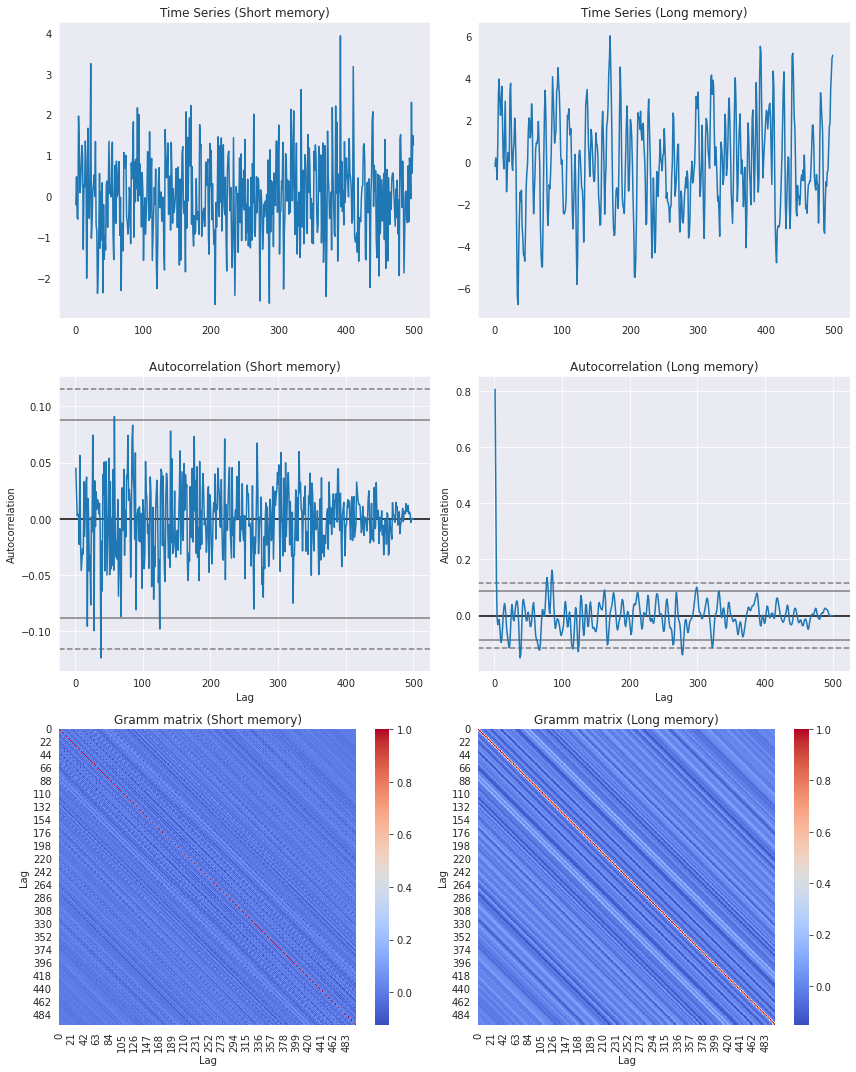

In [4]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from scipy.linalg import toeplitz

# Set the style for seaborn
sns.set_style("dark")

# Creating white noise process
np.random.seed(12345)
WhiteNoise_process = np.random.normal(size=500)

# Creating long memory process (ARFIMA)
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
ARFIMA_process = arma_generate_sample(ar, ma, 500)

# Creating Gramm matrix
def gramm_matrix(data):
    acf_vals = acf(data, nlags=len(data)-1)
    return toeplitz(acf_vals)

# Plotting time series
def plot_time_series(data, ax, title):
    ax.plot(data)
    ax.set_title(title)

# Plotting autocorrelation
def plot_autocorrelation(data, ax, title):
    pd.plotting.autocorrelation_plot(data, ax=ax)
    ax.set_title(title)

# Creating heatmaps for Gramm matrix
def create_heatmap(matrix, ax, title):
    sns.heatmap(matrix, ax=ax, cmap='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Lag')

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Short memory plots
plot_time_series(WhiteNoise_process, axs[0, 0], 'Time Series (Short memory)')
plot_autocorrelation(WhiteNoise_process, axs[1, 0], 'Autocorrelation (Short memory)')
create_heatmap(gramm_matrix(WhiteNoise_process), axs[2, 0], 'Gramm matrix (Short memory)')

# Long memory plots
plot_time_series(ARFIMA_process, axs[0, 1], 'Time Series (Long memory)')
plot_autocorrelation(ARFIMA_process, axs[1, 1], 'Autocorrelation (Long memory)')
create_heatmap(gramm_matrix(ARFIMA_process), axs[2, 1], 'Gramm matrix (Long memory)')

plt.tight_layout()
plt.show()


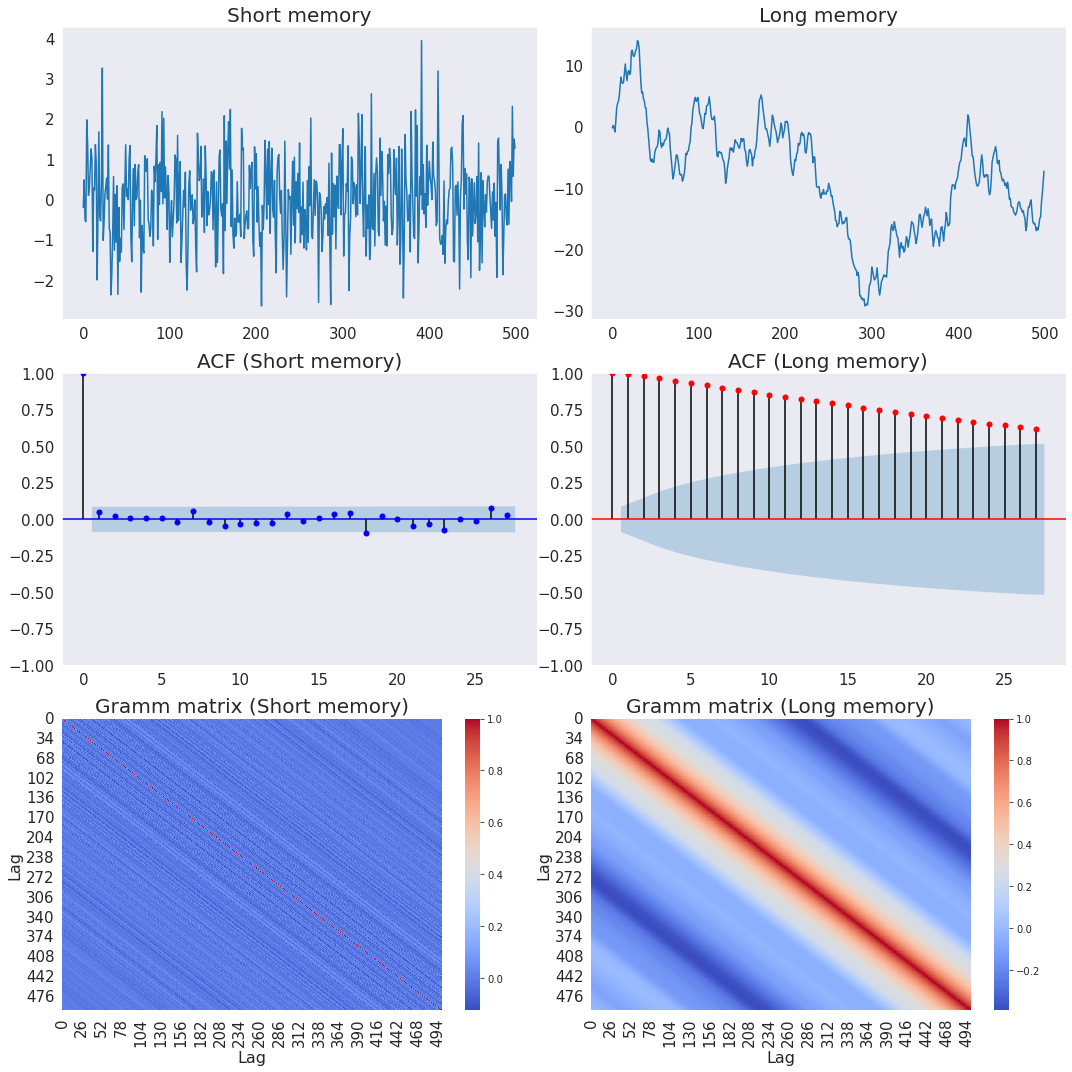

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.linalg import toeplitz
#----------------------------------------------------------
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['axes.titlesize'] = 20
#---------------------------------------------------

# Set the style for seaborn
sns.set_style("dark")

# Creating white noise process
np.random.seed(12345)
WhiteNoise_process = np.random.normal(size=500)

# Creating long memory process (ARFIMA)
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)
arparams = np.array([.75, .25])
maparams = np.array([.65, .15])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
ARFIMA_process = arma_generate_sample(ar, ma, 500)

# Creating Gramm matrix
def gramm_matrix(data):
    acf_vals = acf(data, nlags=len(data)-1)
    return toeplitz(acf_vals)

# Plotting time series
def plot_time_series(data, ax, title):
    ax.plot(data)
    ax.set_title(title, fontsize=24)
    ax.set_title(title)

# Creating heatmaps for Gramm matrix
def create_heatmap(matrix, ax, title):
    sns.heatmap(matrix, ax=ax, cmap='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('Lag', fontsize=16)
    ax.set_ylabel('Lag', fontsize=16)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for ax in axs.flat:
    ax.tick_params(axis='both', labelsize=15)  # Increase x and y tick label size
# Short memory plots
plot_time_series(WhiteNoise_process, axs[0, 0], 'Short memory')
plot_acf(WhiteNoise_process, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('ACF (Short memory)')
create_heatmap(gramm_matrix(WhiteNoise_process), axs[2, 0], 'Gramm matrix (Short memory)')

# Long memory plots
plot_time_series(ARFIMA_process, axs[0, 1], 'Long memory')
plot_acf(ARFIMA_process, ax=axs[1, 1], color='red')
axs[1, 1].set_title('ACF (Long memory)')
create_heatmap(gramm_matrix(ARFIMA_process), axs[2, 1], 'Gramm matrix (Long memory)')

# Save the plot to a file
plot_filename = 'LM_vs_SM_plot'
_=plt.savefig(os.path.join('/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures', plot_filename), dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


In [6]:

def garma_process(ar_coeff, ma_coeff, n, alpha):
    def gegenbauer_polynomial(n, alpha, x):
        if n == 0:
            return 1
        elif n == 1:
            return 2 * alpha * x
        else:
            return 2 * alpha * x * gegenbauer_polynomial(n - 1, alpha, x) - (alpha + n - 1) * gegenbauer_polynomial(n - 2, alpha, x)

    ar_order = len(ar_coeff)
    ma_order = len(ma_coeff)
    max_order = max(ar_order, ma_order)

    # Generate white noise
    white_noise = np.random.normal(0, 1, n + max_order)

    # Initialize the GARMA process
    garma_series = np.zeros(n + max_order)

    for t in range(max_order, n + max_order):
        ar_sum = sum([gegenbauer_polynomial(i, alpha, 1) * ar_coeff[i] * garma_series[t - i - 1] for i in range(ar_order)])
        ma_sum = sum([gegenbauer_polynomial(i, alpha, 1) * ma_coeff[i] * white_noise[t - i] for i in range(ma_order)])
        garma_series[t] = ar_sum + ma_sum

    return garma_series[max_order:]

# Example usage
n = 1000
ar_coeff = [0.8]
ma_coeff = [0.6]
alpha = 0.5

garma_series = garma_process(ar_coeff, ma_coeff, n, alpha)


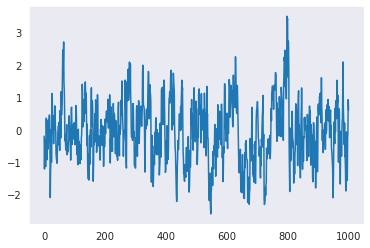

In [7]:
plt.plot(garma_series)

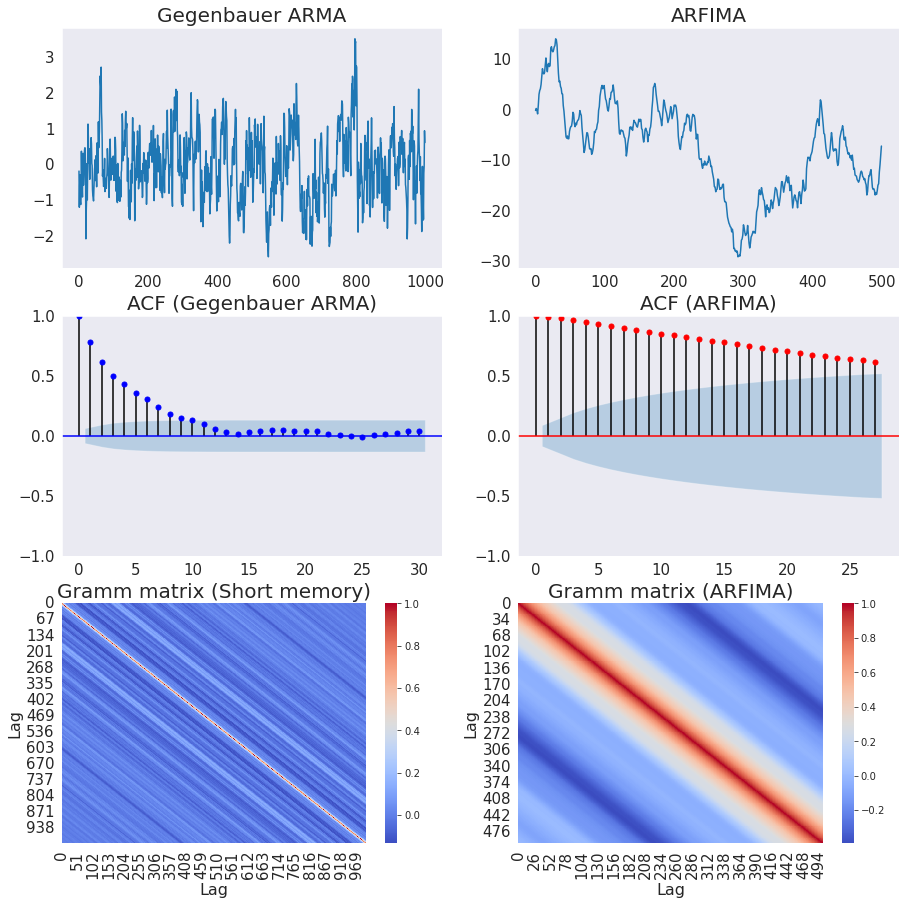

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for ax in axs.flat:
    ax.tick_params(axis='both', labelsize=15)  # Increase x and y tick label size
# Short memory plots
plot_time_series(garma_series, axs[0, 0], 'Gegenbauer ARMA')
plot_acf(garma_series, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('ACF (Gegenbauer ARMA)')
create_heatmap(gramm_matrix(garma_series), axs[2, 0], 'Gramm matrix (Short memory)')

# Long memory plots
plot_time_series(ARFIMA_process, axs[0, 1], 'ARFIMA')
plot_acf(ARFIMA_process, ax=axs[1, 1], color='red')
axs[1, 1].set_title('ACF (ARFIMA)')
create_heatmap(gramm_matrix(ARFIMA_process), axs[2, 1], 'Gramm matrix (ARFIMA)')


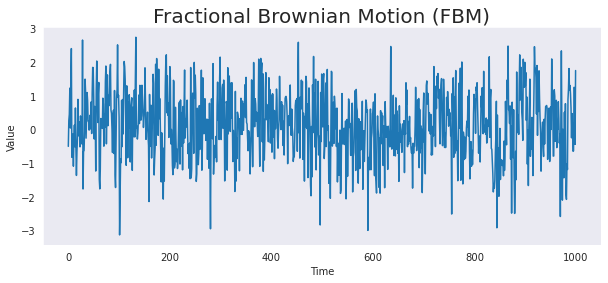

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt

def generate_fbm(n, H):
    """
    Generate Fractional Brownian Motion (FBM) using the Davies Harte method.
    
    Parameters:
        n (int): Length of the FBM sequence.
        H (float): Hurst parameter indicating the degree of long-term dependency (0 < H < 1).
        
    Returns:
        np.ndarray: FBM sequence.
    """
    t = np.arange(0, n+1)
    # Calculate the increments
    dt = t[1:] - t[:-1]
    
    # Generate random Gaussian noise
    noise = np.random.normal(0, 1, n+1)
    
    # Calculate the covariance matrix
    cov = np.zeros((n+1, n+1))
    for i in range(n+1):
        for j in range(n+1):
            cov[i, j] = 0.5 * (np.abs(i - j + 1) ** (2 * H) - 2 * np.abs(i - j) ** (2 * H) + np.abs(i - j - 1) ** (2 * H))
    
    # Perform Cholesky decomposition of the covariance matrix
    L = np.linalg.cholesky(cov)
    
    # Generate FBM sequence
    fbm = np.dot(L, noise)
    
    return fbm[1:]

# Example usage:
n = 1000  # Length of the FBM sequence
H = 0.7   # Hurst parameter

# Generate FBM sequence
fbm = generate_fbm(n, H)

# Plot the FBM time series
plt.figure(figsize=(10, 4))
plt.plot(fbm)
plt.title("Fractional Brownian Motion (FBM)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


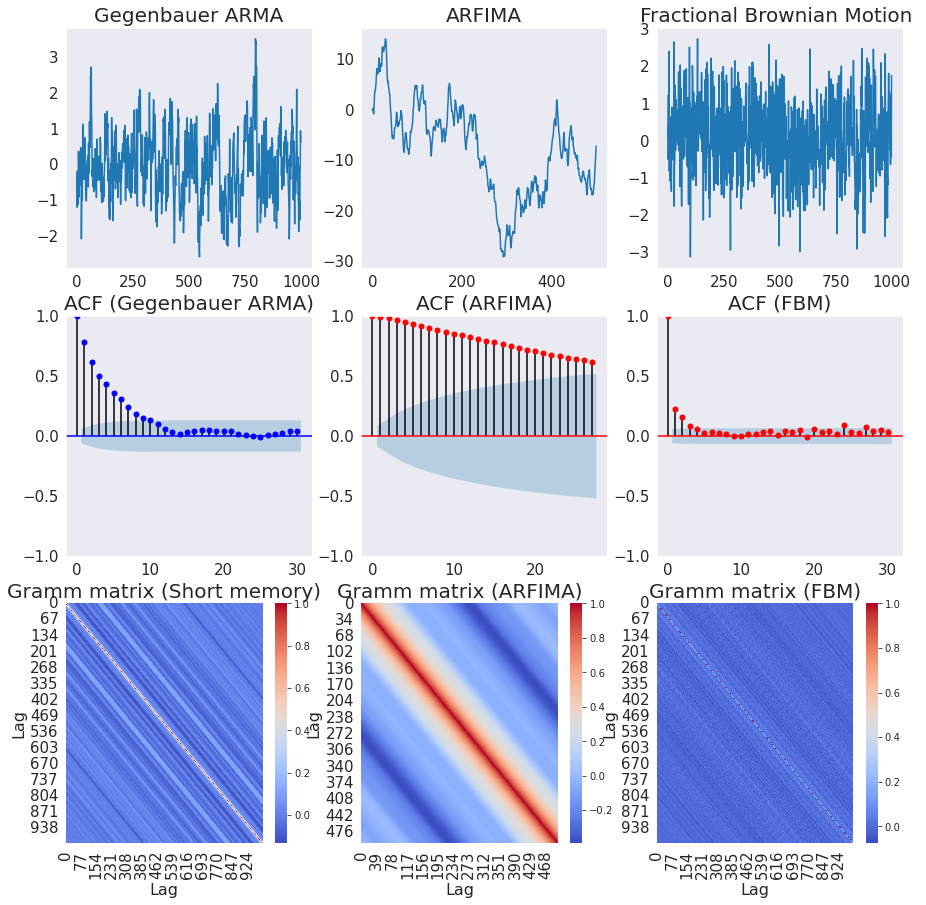

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax in axs.flat:
    ax.tick_params(axis='both', labelsize=15)  # Increase x and y tick label size
# Gegenbauer ARMA
plot_time_series(garma_series, axs[0, 0], 'Gegenbauer ARMA')
plot_acf(garma_series, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('ACF (Gegenbauer ARMA)')
create_heatmap(gramm_matrix(garma_series), axs[2, 0], 'Gramm matrix (Short memory)')

# Long memory plots
plot_time_series(ARFIMA_process, axs[0, 1], 'ARFIMA')
plot_acf(ARFIMA_process, ax=axs[1, 1], color='red')
axs[1, 1].set_title('ACF (ARFIMA)')
create_heatmap(gramm_matrix(ARFIMA_process), axs[2, 1], 'Gramm matrix (ARFIMA)')

# Long memory plots
plot_time_series(fbm, axs[0, 2], 'Fractional Brownian Motion ')
plot_acf(fbm, ax=axs[1, 2], color='red')
axs[1, 2].set_title('ACF (FBM)')
create_heatmap(gramm_matrix(fbm), axs[2, 2], 'Gramm matrix (FBM)')


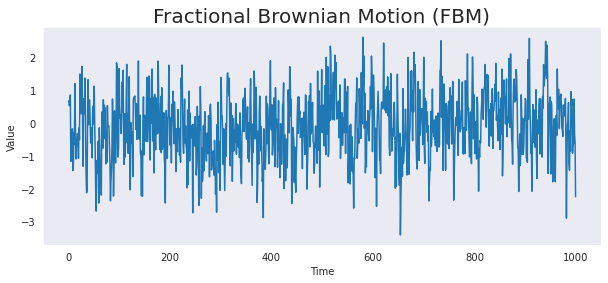

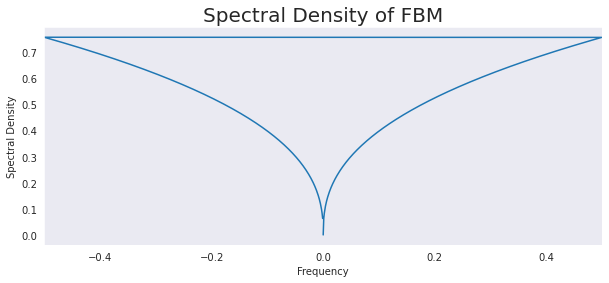

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def spectral_density(f, H):
    """
    Calculate the spectral density of Fractional Brownian Motion (FBM).
    
    Parameters:
        f (np.ndarray): Frequencies at which to calculate the spectral density.
        H (float): Hurst parameter indicating the degree of long-term dependency (0 < H < 1).
        
    Returns:
        np.ndarray: Spectral density values at the given frequencies.
    """
    return np.abs(f)**(2*H - 1)

def generate_fbm(n, H):
    """
    Generate Fractional Brownian Motion (FBM) using the Davies Harte method.
    
    Parameters:
        n (int): Length of the FBM sequence.
        H (float): Hurst parameter indicating the degree of long-term dependency (0 < H < 1).
        
    Returns:
        np.ndarray: FBM sequence.
    """
    t = np.arange(0, n+1)
    # Calculate the increments
    dt = t[1:] - t[:-1]
    
    # Generate random Gaussian noise
    noise = np.random.normal(0, 1, n+1)
    
    # Calculate the covariance matrix
    cov = np.zeros((n+1, n+1))
    for i in range(n+1):
        for j in range(n+1):
            cov[i, j] = 0.5 * (np.abs(i - j + 1) ** (2 * H) - 2 * np.abs(i - j) ** (2 * H) + np.abs(i - j - 1) ** (2 * H))
    
    # Perform Cholesky decomposition of the covariance matrix
    L = np.linalg.cholesky(cov)
    
    # Generate FBM sequence
    fbm = np.dot(L, noise)
    
    return fbm[1:]

# Example usage:
n = 1000  # Length of the FBM sequence
H = 0.7   # Hurst parameter

# Generate FBM sequence
fbm = generate_fbm(n, H)

# Plot the FBM time series
plt.figure(figsize=(10, 4))
plt.plot(fbm)
plt.title("Fractional Brownian Motion (FBM)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Plot the spectral density of FBM
frequencies = np.fft.fftfreq(n, d=1)  # Frequencies
spectral_density_values = spectral_density(frequencies, H)
plt.figure(figsize=(10, 4))
plt.plot(frequencies, spectral_density_values)
plt.title("Spectral Density of FBM")
plt.xlabel("Frequency")
plt.ylabel("Spectral Density")
plt.xlim(-0.5, 0.5)  # Limit the x-axis to the range of interest
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from scipy.linalg import toeplitz

def generate_garch(n, omega, alpha, beta, seed=None):
    """
    Generate synthetic data using the GARCH(1, 1) model.
    
    Parameters:
        n (int): Length of the time series.
        omega (float): The constant term in the GARCH(1, 1) model.
        alpha (float): The coefficient of the lagged squared residuals in the GARCH(1, 1) model.
        beta (float): The coefficient of the lagged conditional variance in the GARCH(1, 1) model.
        seed (int): Seed for the random number generator.
        
    Returns:
        np.ndarray: Synthetic GARCH(1, 1) time series.
    """
    np.random.seed(seed)
    eps = np.random.normal(size=n)
    var = np.zeros(n)
    var[0] = omega / (1 - alpha - beta)
    
    for t in range(1, n):
        var[t] = omega + alpha * eps[t-1]**2 + beta * var[t-1]
    
    returns = np.sqrt(var) * eps
    
    return returns

# Example usage:
n = 1000    # Length of the time series
omega = 0.1   # GARCH constant term
alpha = 0.2   # GARCH coefficient for lagged squared residuals
beta = 0.7    # GARCH coefficient for lagged conditional variance

# Generate GARCH time series
data = generate_garch(n, omega, alpha, beta, seed=0)

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("GARCH(1, 1) Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Calculate and plot the autocorrelation function (ACF)
acf_values = acf(data, nlags=40, fft=False, adjusted=False)
lags = np.arange(0, len(acf_values))
plt.figure(figsize=(10, 4))
plt.stem(lags, acf_values)
plt.title("Autocorrelation Function (ACF) of GARCH(1, 1) Time Series")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.show()

# Calculate and plot the Gram matrix
gram_matrix = toeplitz(acf_values)
plt.figure(figsize=(6, 6))
plt.imshow(gram_matrix, cmap='hot', interpolation='nearest')
plt.title("Gram Matrix of GARCH(1, 1) Time Series")
plt.colorbar()
plt.show()


ZeroDivisionError: float division by zero

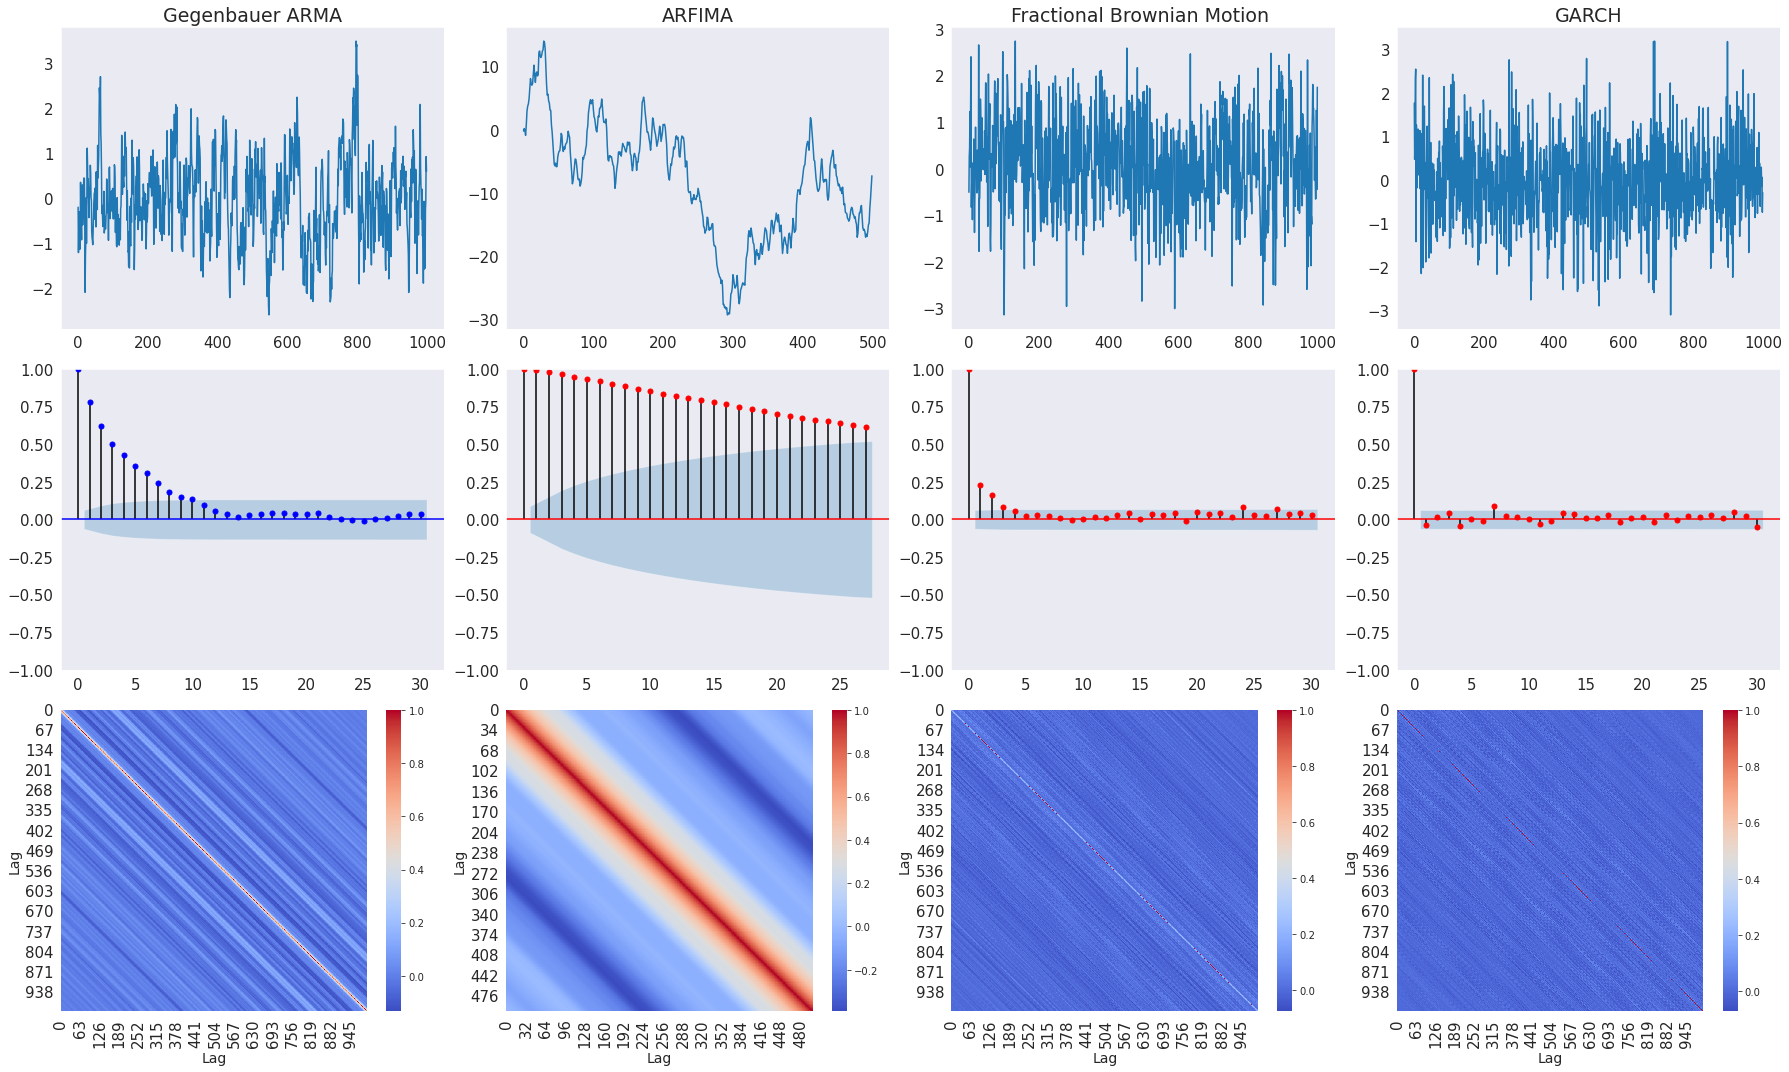

In [25]:
#----------------------------------------------------------
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['axes.titlesize'] = 19
#---------------------------------------------------
# Creating heatmaps for Gramm matrix
def create_heatmap(matrix, ax, title):
    sns.heatmap(matrix, ax=ax, cmap='coolwarm')
    ax.set_title(title)
    ax.set_xlabel('Lag', fontsize=14)
    ax.set_ylabel('Lag', fontsize=14)

# Set the style for seaborn
sns.set_style("dark")

fig, axs = plt.subplots(3, 4, figsize=(25, 15))

for ax in axs.flat:
    ax.tick_params(axis='both', labelsize=15)  # Increase x and y tick label size
# Gegenbauer ARMA
plot_time_series(garma_series, axs[0, 0], 'Gegenbauer ARMA')
plot_acf(garma_series, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('')
create_heatmap(gramm_matrix(garma_series), axs[2, 0], '')

# Long memory plots
plot_time_series(ARFIMA_process, axs[0, 1], 'ARFIMA')
plot_acf(ARFIMA_process, ax=axs[1, 1], color='red')
axs[1, 1].set_title('')
create_heatmap(gramm_matrix(ARFIMA_process), axs[2, 1], '')

# Long memory plots
plot_time_series(fbm, axs[0, 2], 'Fractional Brownian Motion ')
plot_acf(fbm, ax=axs[1, 2], color='red')
axs[1, 2].set_title('')
create_heatmap(gramm_matrix(fbm), axs[2, 2], '')

# Generate GARCH time series
plot_time_series(generate_garch(n, omega, alpha, beta, seed=0), axs[0, 3],'GARCH')
plot_acf(generate_garch(n, omega, alpha, beta, seed=0), ax=axs[1, 3], color='red')
axs[1, 3].set_title('')
create_heatmap(gramm_matrix(generate_garch(n, omega, alpha, beta, seed=0)), axs[2, 3], '')
# Save the plot to a file
plot_filename = 'LM_vs_SM_plot'
_=plt.savefig(os.path.join('/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures', plot_filename), dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()
